# Introduction to Linear Regressions

## Types of supervised learning

- **Classification:** Predict a categorical response
- **Regression:** Predict a continuous response

**Pros:** fast, no tuning required, highly interpretable, well-understood

**Cons:** unlikely to produce the best predictive accuracy (presumes a linear relationship between the features and response)

## Learning Objectives

- Use the **pandas library** to read data into Python.
- Use the **display library** to visualize data.
- Understand **linear regression**, and how does it work.
- Understand **train and interpret** a linear regression model in scikit-learn.
- Learn some **evaluation metrics** for regression problems.
- How do I choose **which features to include** in my model?

## Libraries

We'll be using [Statsmodels](http://statsmodels.sourceforge.net/) for **teaching purposes** since it has some nice characteristics for linear modeling. However, we recommend that you spend most of your energy on [scikit-learn](http://scikit-learn.org/stable/) since it provides significantly more useful functionality for machine learning in general.

In [1009]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model
from IPython.display import display

#from sklearn.linear_model import LinearRegression
#from sklearn import metrics
#from sklearn.cross_validation import train_test_split


# allow plots to appear directly in the notebook
%matplotlib inline

## Example: Advertising Data

Let's take a look at some data, ask some questions about that data, and then use linear regression to answer those questions!

In [1010]:
# read CSV file stored in the current directory and save the results
data = pd.read_csv('Advertising.csv', skipinitialspace=True, index_col=0)

# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


What are the features?
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

What is the response?
- **Sales:** sales of a single product in a given market (in thousands of items)

What else do we know?
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

In [1011]:
#display all data
display(data)

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
6,8.7,48.9,75.0,7.2
7,57.5,32.8,23.5,11.8
8,120.2,19.6,11.6,13.2
9,8.6,2.1,1.0,4.8
10,199.8,2.6,21.2,10.6


Primary object types:

- **DataFrame:** rows and columns (like a spreadsheet)
- **Series:** a single column

In [1012]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [1013]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [1014]:
## Visualizing data 

## Questions About the Advertising Data

Let's pretend you work for the company that manufactures and markets this widget. The company might ask you the following: On the basis of this data, how should we spend our advertising money in the future?

This general question might lead you to more specific questions:
1. Is there a relationship between ads and sales?
2. How strong is that relationship?
3. Which ad types contribute to sales?
4. What is the effect of each ad type of sales?
5. Given ad spending in a particular market, can sales be predicted?

We will explore these questions below!

## Simple Linear Regression

Simple linear regression is an approach for predicting a **quantitative response** using a **single feature** (or "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. To create your model, you must "learn" the values of these coefficients. And once we've learned these coefficients, we can use the model to predict Sales!

## Estimating ("Learning") Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors"):

Let's estimate the model coefficients for the advertising data (only using the variables TV and Sales)

## Estimating Model using 'TV' and 'Sales'

In [1015]:
### STATSMODELS (method1) ###

# create a fitted model
lm1 = smf.ols(formula='Sales ~ TV', data=data).fit()

# print the coefficients
lm1.params

Intercept    7.032594
TV           0.047537
dtype: float64

In [1016]:
### SCIKIT-LEARN (method2) ###

# create X and y
feature_cols = ['TV']
X = data[feature_cols]
y = data['Sales']   

# instantiate and fit
# Create linear regression object
lm2 = linear_model.LinearRegression()

# Train the model using the training sets (this time we use all data)
lm2.fit(X, y)

# print intercept
print ('Intercept: ', lm2.intercept_)
          
# print the coefficients     
print('Coefficients: ', lm2.coef_)

Intercept:  7.03259354913
Coefficients:  [ 0.04753664]


## Interpreting Model Coefficients

How do we interpret the TV coefficient ($\beta_1$)?
- A "unit" increase in TV ad spending is **associated with** a 0.047537 "unit" increase in Sales.
- Or more clearly: An additional $1,000 spent on TV ads is **associated with** an increase in sales of 47.537 widgets.

Note that if an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## Plotting the data and the regression function

Plot scatterplot and the regression function

## Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was **$50,000**. What would we predict for the Sales in that market?

$$y = \beta_0 + \beta_1x$$
$$y = 7.032594 + 0.047537 \times 50$$

In [1017]:
# manually calculate the prediction
7.032594 + 0.047537*50

9.409444

In [1018]:
### STATSMODELS ###

# you have to create a DataFrame since the Statsmodels formula interface expects it
X_new = pd.DataFrame({'TV': [50]})

# predict for a new observation
lm1.predict(X_new)

array([ 9.40942557])

In [1019]:
### SCIKIT-LEARN ###

# predict for a new observation
lm2.predict(50)

array([ 9.40942557])

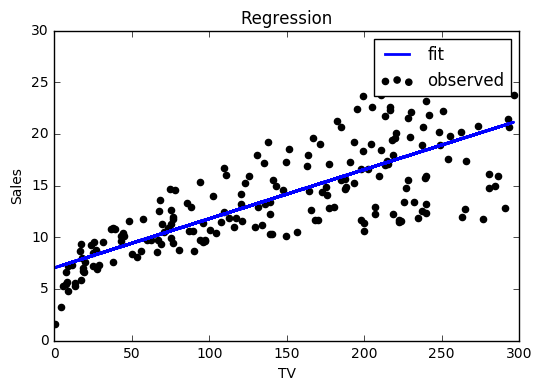

In [1020]:
# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.xlim([0,300])
plt.ylim([0, 30])
plt.plot(X, lm2.predict(X), label='fit', color='blue', linewidth=2)

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

Thus, we would predict Sales of 9,409 widgets in that market.

## Estimating Model using 'Radio' and 'Sales'

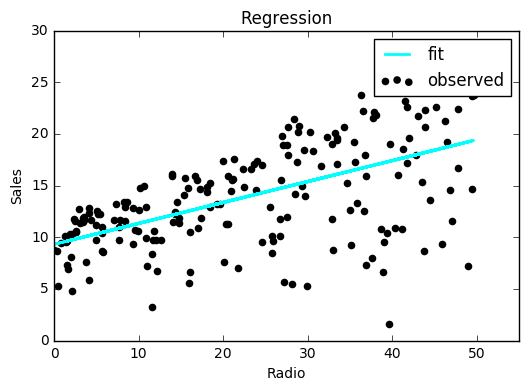

In [1021]:
### SCIKIT-LEARN (method2) ###

# create X and y
feature_cols = ['Radio']
X = data[feature_cols]
y = data['Sales']   

# instantiate and fit
lm2 = linear_model.LinearRegression()

# Train the model using the training sets (this time we use all data)
lm2.fit(X, y)

# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.xlim([0, 55])
plt.ylim([0, 30])
plt.plot(X, lm2.predict(X), label='fit', color='Cyan', linewidth=2)

plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

## Estimating Model using 'Newspaper' and 'Sales'

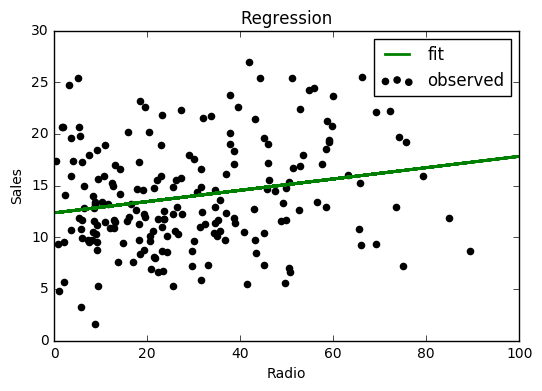

In [1022]:
### SCIKIT-LEARN (method2) ###

# create X and y
feature_cols = ['Newspaper']
X = data[feature_cols]
y = data['Sales']   

# instantiate and fit
lm2 = linear_model.LinearRegression()

# Train the model using the training sets (this time we use all data)
lm2.fit(X, y)

# Plot scatterplot and the regression function
plt.scatter(X, y, color='black', label='observed')

plt.xlim([0,100])
plt.ylim([0, 30])
plt.plot(X, lm2.predict(X), label='fit', color='Green', linewidth=2)

plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Regression')
plt.legend(loc='best')

plt.show()

## How Well Does the Model Fit the data?

The most common way to evaluate the overall fit of a linear model is by the **R-squared** value. R-squared is the **proportion of variance explained**, meaning the proportion of variance in the observed data that is explained by the model, or the reduction in error over the **null model**. (The null model just predicts the mean of the observed response, and thus it has an intercept and no slope.)

R-squared is between 0 and 1, and higher is better because it means that more variance is explained by the model. Here's an example of what R-squared "looks like":

Let's calculate the R-squared value for our simple linear model:

In [1023]:
### STATSMODELS ###

# print the R-squared value for the model
lm1.rsquared

0.61187505085007099

In [1024]:
### SCIKIT-LEARN ###

# The mean squared error
print("Mean squared error: %.4f" % np.mean((lm2.predict(X) - y) ** 2))

# print the R-squared value (explained variance score) for the model: 1 is perfect prediction
print('Variance score: %.4f' % lm2.score(X, y))

Mean squared error: 25.6740
Variance score: 0.0521


Is that a "good" R-squared value? It's hard to say. The threshold for a good R-squared value depends widely on the domain. Therefore, it's most useful as a tool for **comparing different models**.

## Multiple Linear regression

Simple linear regression can easily be extended to include multiple features. This is called **multiple linear regression**:
### Form of linear regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

Let's estimate these coefficients:

In [1025]:
### STATSMODELS ###

# create a fitted model with all three features
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()

# print the coefficients
lm1.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [1026]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['TV', 'Radio', 'Newspaper']
X = data[feature_cols]
y = data[['Sales']]

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, Y)

# print the coefficients
print ('Intercept: ', lm2.intercept_)
print ('Coefficients: ', lm2.coef_)

Intercept:  [ 2.93888937]
Coefficients:  [[ 0.04576465  0.18853002 -0.00103749]]


In [1027]:
### STATSMODELS ###

# print a summary of the fitted model
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 31 May 2017   Prob (F-statistic):           1.58e-96
Time:                        23:45:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000         2.324     3.554
TV             0.0458      0.001     32.809      0.000         0.043     0.049
Radio          0.1885      0.009     21.893      0.000         0.172     0.206
Newspaper     -0.0010      0.006     -0.177      0.860        -0.013     0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Feature Selection Discussion

How do I decide **which features to include** in a linear model? Here's one idea:
- Try different models, and only keep features in the model if they have small p-values.
- Check whether the R-squared value goes up when you add new features.

What are the **drawbacks** to this approach?
- Linear models rely upon a lot of **assumptions** (such as the features being independent), and if those assumptions are violated (which they usually are), R-squared and p-values are less reliable.
- Using a p-value cutoff of 0.05 means that if you add 100 features to a model that are **pure noise**, 5 of them (on average) will still be counted as significant.
- R-squared is susceptible to **overfitting**, and thus there is no guarantee that a model with a high R-squared value will generalize. Below is an example:

In [1028]:
### STATSMODELS ###

# only include TV and Radio in the model
lm1 = smf.ols(formula='Sales ~ TV + Radio', data=data).fit()
lm1.rsquared

0.89719426108289557

In [1029]:
# add Newspaper to the model (which we believe has no association with Sales)
lm1 = smf.ols(formula='Sales ~ TV + Radio + Newspaper', data=data).fit()
lm1.rsquared

0.89721063817895219

**R-squared will always increase as you add more features to the model**, even if they are unrelated to the response. Thus, selecting the model with the highest R-squared is not a reliable approach for choosing the best linear model.

There is alternative to R-squared called **adjusted R-squared** that penalizes model complexity (to control for overfitting), but it generally [under-penalizes complexity](http://scott.fortmann-roe.com/docs/MeasuringError.html).

So is there a better approach to feature selection? **Train/test split** or **cross-validation.** They provide a more reliable estimate of out-of-sample error, and thus are better for choosing which of your models will best **generalize** to out-of-sample data. There is extensive functionality for cross-validation in scikit-learn, including automated methods for searching different sets of parameters and different models. Importantly, cross-validation can be applied to **any model**, whereas the methods described above only apply to **linear models**.

## Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's create some example numeric predictions, and calculate **three common evaluation metrics** for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

## Simple examples for evaluation metrics

In [1030]:
# define true and predicted response values
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]

# calculate MAE by hand
print((10 + 0 + 20 + 10)/4.)

# calculate MAE using scikit-learn
from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))


# calculate MSE by hand
print((10**2 + 0**2 + 20**2 + 10**2)/4.)

# calculate MSE using scikit-learn
print(metrics.mean_squared_error(true, pred))

# calculate RMSE by hand
import numpy as np
print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4.))

# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(true, pred)))

10.0
10.0
150.0
150.0
12.2474487139
12.2474487139


## Our example of the regression for 'TV' and 'Sales'

In [1031]:
# make predictions on the testing set
y_pred = lm2.predict(X)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y, y_pred)))

1.66857014072


## *** Multiple Linear Regression Analysis on Advertising Data ***
## 1. Preparing X and Y using pandas

- scikit-learn expects X (feature matrix) and Y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [1032]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio', 'Newspaper']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# equivalent command to do the above in one line
X = data[['TV', 'Radio', 'Newspaper']]

# print the first 5 rows
X.head()

,TV,Radio,Newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [1033]:
# check the type and shape of X
print(type(X))
print(X.shape)

<class 'pandas.core.frame.DataFrame'>
(200, 3)


In [1034]:
# select a Series from the DataFrame
y = data['Sales']

# print the first 5 values
y.head()

1    22.1
2    10.4
3     9.3
4    18.5
5    12.9
Name: Sales, dtype: float64

In [1035]:
# check the type and shape of y
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


## 2. Splitting X and y into training and testing sets

In [1036]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [1037]:
# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150,)
(50, 3)
(50,)


## 3. Linear regression in scikit-learn

In [1038]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Interpreting model coefficients

In [1039]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

2.87696662232
[ 0.04656457  0.17915812  0.00345046]


In [1040]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('TV', 0.046564567874150288),
 ('Radio', 0.17915812245088841),
 ('Newspaper', 0.0034504647111804343)]

$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

How do we interpret the **TV coefficient** (0.0466)?

- For a given amount of Radio and Newspaper ad spending, **a "unit" increase in TV ad spending** is associated with a **0.0466 "unit" increase in Sales**.
- Or more clearly: For a given amount of Radio and Newspaper ad spending, **an additional $1,000 spent on TV ads** is associated with an **increase in sales of 46.6 items**.

Important notes:

- This is a statement of **association**, not **causation**.
- If an increase in TV ad spending was associated with a **decrease** in sales, $\beta_1$ would be **negative**.

## 4. Making predictions

In [1041]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

We need an **evaluation metric** in order to compare our predictions with the actual values!

## 5. Computing the RMSE for our Sales predictions

In [1042]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


This value is lower than the RMSE value for the regression where we use only TV

## 6. Feature selection consideration

Does **Newspaper** "belong" in our model? In other words, does it improve the quality of our predictions?

Let's **remove it** from the model and check the RMSE!

In [1043]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38790346994


The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.) Thus, it is unlikely that this feature is useful for predicting Sales, and should be removed from the model.

## Resources

Linear regression:
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) by Robert Nau (Duke)

Pandas:
- [read_csv](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) and [read_table](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_table.html) documentation

##### The parts of the code were implemented by Kevin Markham